# 分组聚合


分组聚合适合应用于 离散数据

In [3]:
# 数据准备
df=pd.read_excel('data/pandas-team.xls')
# df.head()

## 由来

Hadley Wickham（数据科学家）在其知名论文 The Split-Apply-Combine Strategy for Data Analysis 中，阐述了“拆分－应用－合并”（Split-Apply-Combine）策略在数据分析中的应用

pandas 对这一思想进行了实现


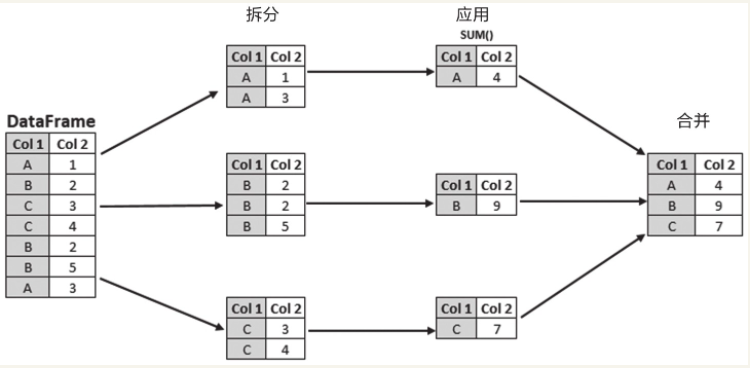

## groupby 语法

groupby完成的是拆分工作，对 数据 进行分组，返回 分组器对象

对DataFrame进行分组会返回DataFrameGroupBy对象，对Series分组会返回SeriesGroupBy对象


DataFrameGroupBy对象与SeriesGroupBy对象统称为分组器对象
```PYTHON
df.groupby(
    by=None,
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    squeeze: 'bool | lib.NoDefault' = <no_default>,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
```
以上大多参数对于Series也是适用的

```
- by
拆分 DataFrame 的依据
by=fun，DataFrame 的每个索引会调用这个fun，从而返回值，按照这些值进行分组
by=dict/Serise，会按照 dict/Serise 的值来拆分数据
by=ndarray，使用这些值来拆分数据

- axis
0 按列拆分
1 按行拆分

- level

- as_index

- sort
是否对分组的结果排序，默认排序
若 sort=False，则会让第一个出现的在前，提高分组性能

- group_keys

- squeeze

- observed

- dropna

```

panads.groupby()的执行流程 :
```
将dataframe 按照 某条件 分开
对每个分组应用如下函数
.sum()
.count()
.mean()
.std()
.aggregate()
.apply()
.etc..
合并所有分组
dataframe.groupby('Continent').sum(axis=0)
```


- Aggregation 聚合

为每个组计算统计信息

如：计算每个组的sum、count
- Transformation 转换
对特定组执行计算，并返回 a index-like object

如：标准化组内数据

用每个组的的数据填充NA

- Filtration 过滤
根据分组计算的True或False，放弃一些组

如：丢弃只有少数成员的组

根据组的sum或mean过滤数据

注：
```
如果按一列聚合，只传列名字符串，如果多个就要传由列名组成的列表
聚合方法可以使用 Pandas 的数学统计函数 或者 Numpy 的统计函数
如果是 python 的内置统计函数，直接使用变量，不需要加引号
如果需要将空值也进行聚合，需要传入 dropna=Flase
```

## 简单使用

准备数据

计算各组的和

In [10]:
df.groupby('team').sum()

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


也可不同列进行不同的聚合操作，一列也可同时使用多个聚合操作

In [12]:
# 对同一列使用不同的计算方法
df.groupby('team').agg({'Q1': [sum, 'std', max],  # 使用三个方法
                        'Q2': 'count', # 总数
                        'Q3':'mean', # 平均
                        'Q4': max}) # 最大值

Q1                   Q2         Q3  Q4
       sum        std max count       mean max
team                                          
A     1066  24.155136  96    17  51.470588  97
B      975  32.607896  97    22  54.636364  99
C     1056  31.000768  98    22  48.545455  98
D      860  25.886166  80    19  65.315789  99
E      963  33.242767  97    20  44.050000  98

## 分组

groupby 语法的by可以就通过 fun、dict/Serise、ndarray进行分组，以下是对此的一一实践

###  label 分组

label : dataframe的一列

指定DataFrame中的一列，按这列的去重数据分组

In [ ]:
grouped = df.groupby('col') # 单列
grouped = df.groupby('col', axis='columns') # 按行
grouped = df.groupby(['col1', 'col2']) # 多列

In [9]:
groupby_team=df.groupby('team')

In [31]:
# get_group 查看分组内容
groupby_team.get_group('E')

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
15,James,E,48,77,52,11
19,Max,E,97,75,41,3
24,Isaac,E,74,23,28,65
26,Teddy,E,71,91,21,48
29,Riley,E,35,26,59,83
31,Joseph,E,67,87,87,93
36,Jaxon,E,88,98,19,98
41,Arlo8,E,48,34,52,51
43,Jude,E,8,45,13,65


### 表达式分组

通过 行和列的表达式，将数据分为True、Flase两组

In [18]:
# 索引值是否为偶数，分成两组
df.groupby(lambda x:x%2==0).sum()
# df.groupby(df.index%2==0) 同上

,Q1,Q2,Q3,Q4
False,2322,2449,2823,2699
True,2598,2806,2444,2579


In [20]:
# 列名包含Q的分成一组
df.groupby(lambda x:'Q' in x,axis=1).sum()

,False,True
0,LiverE,198
1,ArryC,167
2,AckA,219
3,EorgeC,338
4,OahD,261
...,...,...
95,GabrielC,268
96,Austin7C,125
97,Lincoln4C,212
98,EliE,234


我们还可以使用之前介绍的在查询中用到的筛选条件函数对数据进行分组

In [ ]:
# 按索引奇偶行分为True和False两组
df.groupby(df.index%2==0) # 同上例
# 按姓名首字母分组
df.groupby(df.name.str[0])
# 按A及B、其他团队分组
df.groupby(df.team.isin(['A','B']))
# 按姓名第一个字母和第二个字母分组
df.groupby([df.name.str[0], df.name.str[1]])
# 按日期和小时分组
df.groupby([df.time.date, df.time.hour])

### 函数分组

by=func，func要返回一个分组依据

加入我们有一个时间列，如果年对数据分组，则从时间中提取年

In [ ]:
# 从时间列time中提取年份来分组
df.groupby(df.time.apply(lambda x:x.year)).count()

我们实现一个按姓名的首字母为元音、辅音分组的案例

In [25]:
def get_letter_type(letter):
    if letter[0].lower() in 'aeiou':
        return '元因'
    else:
        return '辅音'

In [26]:
df.set_index('name').groupby(get_letter_type).sum()

,Q1,Q2,Q3,Q4
name,,,,
元因,1462,1440,1410,1574
辅音,3458,3815,3857,3704


### 多种方法混合

按team、姓名首字母是否为元音分组

In [30]:
df.groupby(['team',df.name.apply(get_letter_type)]).sum()

Q1   Q2   Q3   Q4
team name                    
A    元因    274  197  141  199
     辅音    792  442  734  584
B    元因    309  291  269  218
     辅音    666  927  933  918
C    元因    473  488  453  464
     辅音    583  706  615  663
D    元因    273  333  409  486
     辅音    587  858  832  713
E    元因    133  131  138  207
     辅音    830  882  743  826

### 用pipe调用分组方法

df.pipe() 管道 可以调用一个函数对dataframe进行操作

而 Pandas的groupby是一个函数——pd.DataFrame.groupby

In [32]:
df.pipe(pd.DataFrame.groupby,'team').sum()

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


可以传入更多参数，也能完成数据的分组聚合操作

### 分组器Grouper

分组器是为了可以复用分组工作

```PYTHON
pandas.Grouper(key=None, level=None, freq=None, axis=0, sort=False)
```

使用案例

In [ ]:
# df.groupby('team')
df.groupby(pd.Grouper('team')).sum()
# 如果是时间，可以60秒一分组
df.groupby(Grouper(key='date', freq='60s'))

# 轴方向
df.groupby(Grouper(level='date', freq='60s', axis=1))
# 按索引
df.groupby(pd.Grouper(level=1)).sum()
# 多列
df.groupby([pd.Grouper(freq='1M', key='Date'), 'Buyer']).sum()
df.groupby([pd.Grouper('dt', freq='D'),
            pd.Grouper('other_column')
           ])

# 按轴层级
df.groupby([pd.Grouper(level='second'), 'A']).sum()
df.groupby([pd.Grouper(level=1), 'A']).sum()

# 按时间周期分组
df['column_name'] = pd.to_datetime(df['column_name'])
df.groupby(pd.Grouper(key='column_name', freq="M")).mean()

# 10年一个周期
df.groupby(pd.cut(df.date,
                  pd.date_range('1970', '2020', freq='10YS'),
                  right=False)
          ).mean()

### 索引与排序

groupby分组操作后，分组字段会变成索引，并且会对索引进行排序

可以使用as_index=False、sort=False进行取消

In [36]:
df.groupby('team',as_index=False,sort=False).sum()

,team,Q1,Q2,Q3,Q4
0,E,963,1013,881,1033
1,C,1056,1194,1068,1127
2,A,1066,639,875,783
3,D,860,1191,1241,1199
4,B,975,1218,1202,1136


## 操作分组对象

### 分组器对象

#### get_group()

获得分组内容

In [98]:
df.groupby('team')

In [97]:
df.groupby('team').get_group('A')

,name,team,Q1,Q2,Q3,Q4
2,Ack,A,57,60,18,84
7,Lfie,A,9,10,99,37
9,Oscar,A,77,9,26,67
16,Joshua,A,63,4,80,30
17,Henry,A,91,15,75,17
20,Lucas,A,60,41,77,62
22,Arthur,A,44,53,42,40
34,Reggie1,A,30,12,23,9
40,Toby,A,52,27,17,68
42,Dylan,A,86,87,65,20


#### 属性groups

dict,pandas 定义的 PrettyDict,包含分组名 分组内容lst

可以通过 groups.keys() 获取分组名称

In [40]:
# 查看分组内容
df.groupby('team').groups

{'A': [2, 7, 9, 16, 17, 20, 22, 34, 40, 42, 51, 67, 70, 71, 75, 79, 88], 'B': [6, 10, 11, 14, 25, 30, 35, 38, 39, 50, 53, 56, 58, 60, 64, 77, 78, 83, 84, 85, 92, 93], 'C': [1, 3, 5, 12, 13, 18, 28, 32, 33, 37, 46, 47, 54, 62, 73, 81, 86, 87, 91, 95, 96, 97], 'D': [4, 8, 21, 23, 27, 44, 48, 49, 52, 57, 59, 63, 65, 66, 68, 69, 72, 89, 94], 'E': [0, 15, 19, 24, 26, 29, 31, 36, 41, 43, 45, 55, 61, 74, 76, 80, 82, 90, 98, 99]}

In [46]:
# 查看分组 label
df.groupby('team').groups.keys()

dict_keys(['A', 'B', 'C', 'D', 'E'])

多层索引

In [50]:
# 用团队和姓名首字母分组
grouped2 = df.groupby(['team', df.name.str[0]])
grouped2.group

{('A', 'A'): [2, 22, 88], ('A', 'B'): [71], ('A', 'C'): [67], ('A', 'D'): [42], ('A', 'H'): [17, 51], ('A', 'J'): [16], ('A', 'L'): [7, 20], ('A', 'N'): [70], ('A', 'O'): [9], ('A', 'R'): [34], ('A', 'S'): [75], ('A', 'T'): [40, 79], ('B', 'A'): [6, 83], ('B', 'D'): [56], ('B', 'E'): [30, 38, 78], ('B', 'F'): [53], ('B', 'G'): [92], ('B', 'H'): [25, 39, 64], ('B', 'J'): [50, 93], ('B', 'K'): [84], ('B', 'L'): [10, 11, 58, 85], ('B', 'M'): [77], ('B', 'R'): [60], ('B', 'S'): [35], ('B', 'T'): [14], ('C', 'A'): [1, 12, 32, 33, 96], ('C', 'C'): [86, 91], ('C', 'D'): [28], ('C', 'E'): [3, 73, 81], ('C', 'G'): [95], ('C', 'H'): [5], ('C', 'J'): [47], ('C', 'L'): [87, 97], ('C', 'M'): [62], ('C', 'O'): [54], ('C', 'S'): [37], ('C', 'T'): [13, 46], ('C', 'W'): [18], ('D', 'A'): [57, 63, 94], ('D', 'B'): [44, 52], ('D', 'C'): [49], ('D', 'E'): [21, 89], ('D', 'F'): [27], ('D', 'H'): [68], ('D', 'J'): [66], ('D', 'L'): [48, 59, 72], ('D', 'M'): [23], ('D', 'O'): [4], ('D', 'R'): [8, 65], ('D', 

In [52]:
# 选择B组、姓名以A开头的数据
grouped2.get_group(('B', 'A'))

,name,team,Q1,Q2,Q3,Q4
6,Acob,B,61,95,94,8
83,Albert0,B,85,38,41,17


#### 属性 indices

indices 返回 a dict

key 为组名,value 为 ndarray

可以实现对分组选取

In [53]:
# 获取分组字典数据
df.groupby('team').indices

{'A': array([ 2,  7,  9, 16, 17, 20, 22, 34, 40, 42, 51, 67, 70, 71, 75, 79, 88],
       dtype=int64),
 'B': array([ 6, 10, 11, 14, 25, 30, 35, 38, 39, 50, 53, 56, 58, 60, 64, 77, 78,
        83, 84, 85, 92, 93], dtype=int64),
 'C': array([ 1,  3,  5, 12, 13, 18, 28, 32, 33, 37, 46, 47, 54, 62, 73, 81, 86,
        87, 91, 95, 96, 97], dtype=int64),
 'D': array([ 4,  8, 21, 23, 27, 44, 48, 49, 52, 57, 59, 63, 65, 66, 68, 69, 72,
        89, 94], dtype=int64),
 'E': array([ 0, 15, 19, 24, 26, 29, 31, 36, 41, 43, 45, 55, 61, 74, 76, 80, 82,
        90, 98, 99], dtype=int64)}

In [55]:
# 选择A组
df.groupby('team').indices['A']

array([ 2,  7,  9, 16, 17, 20, 22, 34, 40, 42, 51, 67, 70, 71, 75, 79, 88],
      dtype=int64)

### 迭代分组对象

分组器的每个元素是 tuple(分组label,分组dataframe)

可以通过如下方式遍历 dataframe

In [57]:
for pre in df.groupby('team'):
    print(type(pre))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [61]:
for name,group in df.groupby('team'):
    print(name)
    print(type(group))

A
<class 'pandas.core.frame.DataFrame'>
B
<class 'pandas.core.frame.DataFrame'>
C
<class 'pandas.core.frame.DataFrame'>
D
<class 'pandas.core.frame.DataFrame'>
E
<class 'pandas.core.frame.DataFrame'>


### 选择部分分组

In [62]:
grouped_team=df.groupby('team')

通过如下方式选择其中一个分组

注意选择一个返回 SeriesGroupBy,选择多个分组返回 DataFrameGroupBy

In [66]:
# 返回 SeriesGroupBy 
grouped_team.Q1
# grouped_team['Q1'] #同上

In [69]:
# 返回 DataFrameGroupBy
grouped_team[['Q1','Q2']]

In [71]:
grouped_team[['Q1','Q2']].sum()

,Q1,Q2
team,,
A,1066,639
B,975,1218
C,1056,1194
D,860,1191
E,963,1013


### apply()在分组中的应用

apply() 在复杂需求下非常有用

分组器对象调用 apply(),传入的是每个分组dataframe,经 apply() 处理后将结果组合

数据中所有元素*2

In [73]:
# 可以看到字符串也复制了一份
df.groupby('team').apply(lambda x:x*2)

,name,team,Q1,Q2,Q3,Q4
0,LiverLiver,EE,178,42,48,128
1,ArryArry,CC,72,74,74,114
2,AckAck,AA,114,120,36,168
3,EorgeEorge,CC,186,192,142,156
4,OahOah,DD,130,98,122,172
...,...,...,...,...,...,...
95,GabrielGabriel,CC,96,118,174,148
96,Austin7Austin7,CC,42,62,60,86
97,Lincoln4Lincoln4,CC,196,186,2,40
98,EliEli,EE,22,148,116,182


将分组内容的name转化为lst

In [77]:
df.groupby('team').apply(lambda x:x['name'].tolist())

team
A    [Ack, Lfie, Oscar, Joshua, Henry, Lucas, Arthu...
B    [Acob, Leo, Logan, Thomas, Harrison, Edward, S...
C    [Arry, Eorge, Harlie, Archie, Theo, William, D...
D    [Oah, Reddie, Ethan, Mason, Finley, Benjamin, ...
E    [Liver, James, Max, Isaac, Teddy, Riley, Josep...
dtype: object

In [78]:
type(_)

pandas.core.series.Series

每组返回Q1最高的3个

In [80]:
def get_first3(df_,label):
    return df_[label].sort_values(ascending=False).head(3)

In [81]:
df.groupby('team').apply(get_first3,'Q1')

team    
A     88    96
      17    91
      70    87
B     38    97
      25    89
      77    89
C     97    98
      3     93
      32    91
D     23    80
      57    79
      21    79
E     19    97
      80    92
      0     89
Name: Q1, dtype: int64

传入一个Series映射不同统计聚合算法

In [85]:
df.groupby('team').apply(
    lambda x:pd.Series({
        'Q1_sum':x['Q1'].sum(),
        'Q2_max':x['Q2'].max(),
        'Q3_min':x['Q3'].min(),
        'Q4_prodsum':(x['Q4']*x['Q4']).sum()
    })
)

,Q1_sum,Q2_max,Q3_min,Q4_prodsum
team,,,,
A,1066,87,14,51129
B,975,99,12,76696
C,1056,96,1,68571
D,860,97,10,87473
E,963,98,13,71317


In [86]:
def f_mi(x):
    d=[]
    d.append(x['Q1'].sum())
    d.append(x['Q2'].max())    
    d.append(x['Q3'].min())    
    d.append((x['Q4']*x['Q4']).sum())
    return pd.Series(d,index=[['Q1','Q2','Q3','Q4'],
                              ['sum','max','mean','prodsum']])

In [87]:
df.groupby('team').apply(f_mi)

,Q1,Q2,Q3,Q4
,sum,max,mean,prodsum
team,,,,
A,1066,87,14,51129
B,975,99,12,76696
C,1056,96,1,68571
D,860,97,10,87473
E,963,98,13,71317


### pipe()在分组中的应用

分组器对象调用 pipe(),传入的是分组器对象,返回 pipe() 处理的结果.

注意与 apply() 的不同

pipe() 与 apply() 都可应对复杂需求,但 apply() 只能操作组内数据,pipe() 可操作整个数据

In [90]:
# 每组最大值和最小值之和
# 因为传入的是分组器对象 ,分组器调用聚合是在组内调用
df.groupby('team').pipe(lambda x:x.max()+x.min())

,name,Q1,Q2,Q3,Q4
team,,,,,
A,Tyler,96,87,99,97
B,Thomas,97,99,99,99
C,William,98,96,87,98
D,Theodore3,80,97,95,99
E,Zachary,97,98,87,98


In [92]:
# 注意 正因 pipe()传入的是分组器对象,因此可调用 get_group() 访问其他组的数据,而 apply 则不能
def mean_diff(x):
    return x.get_group('A').mean()-x.get_group('B').mean()

In [93]:
# A 组和 B 组平均值的差值
df.groupby('team').pipe(mean_diff)

C:\Users\huguobin\AppData\Local\Temp/ipykernel_4548/3364271741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return x.get_group('A').mean()-x.get_group('B').mean()


Q1    18.387701
Q2   -17.775401
Q3    -3.165775
Q4    -5.577540
dtype: float64

### transform()

分组器调用 transform(),会对原始数据每个元素进行处理,返回与原始数据同形状的 dataframe

具体过程:

以此传入每个分组的每一列,对该列进行计算后,将该列所有数据同义替换为计算后的值,最后以原 dataframe 形状输出

In [100]:
df.groupby('team').transform(np.mean)

C:\Users\huguobin\AppData\Local\Temp/ipykernel_4548/1139258752.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.groupby('team').transform(np.mean)


,Q1,Q2,Q3,Q4
0,48.150000,50.650000,44.050000,51.650000
1,48.000000,54.272727,48.545455,51.227273
2,62.705882,37.588235,51.470588,46.058824
3,48.000000,54.272727,48.545455,51.227273
4,45.263158,62.684211,65.315789,63.105263
...,...,...,...,...
95,48.000000,54.272727,48.545455,51.227273
96,48.000000,54.272727,48.545455,51.227273
97,48.000000,54.272727,48.545455,51.227273
98,48.150000,50.650000,44.050000,51.650000


In [ ]:
df.groupby('team').transform(max) # 最大值
df.groupby('team').transform(np.std) # 标准差
# 使用函数，和上一个学生的差值（没有处理姓名列）
df.groupby('team').transform(lambda x: x.shift(-1))
# 函数
def score(gb):
    return (gb - gb.mean()) / gb.std()*10
# 调用
grouped.transform(score)

### filter()

分组器对象调用 filter(),传入每个分组的dataframe,经 filter()处理后返回布尔值(不是布尔序列),为真的dataframe为显示

返回满足条件的分组

示例需求:
    按团队分组，然后每组的每个季度成绩为本季度的平均分，全年的成绩又是这个季度平均分的平均分，最终需要筛选出团队中分数高于51的所有成员。

In [105]:
# 每组每个季度的平均分
# df.groupby('team').mean()

In [106]:
# 每组4个季度的平均分的平均分为本组的总平均分
# df.groupby('team').mean().mean(1)

In [104]:
df.groupby(['team']).filter(lambda x:x.mean(1).mean()>51)

C:\Users\huguobin\AppData\Local\Temp/ipykernel_4548/578755640.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby(['team']).filter(lambda x:x.mean(1).mean()>51)


,name,team,Q1,Q2,Q3,Q4
4,Oah,D,65,49,61,86
6,Acob,B,61,95,94,8
8,Reddie,D,64,93,57,72
10,Leo,B,17,4,33,79
11,Logan,B,9,89,35,65
14,Thomas,B,80,48,56,41
21,Ethan,D,79,45,89,88
23,Mason,D,80,96,26,49
25,Harrison,B,89,13,18,75
27,Finley,D,62,73,84,68


In [107]:
# 其他案例
# Q1成绩至少有一个大于97的组
# df.groupby(['team']).filter(lambda x: (x['Q1'] > 97).any())
# 所有成员平均成绩大于60的组
# df.groupby(['team']).filter(lambda x: (x.mean() >= 60).all())
# Q1所有成员成绩之和超过1060的组
# df.groupby('team').filter(lambda g: g.Q1.sum() > 1060)

### 其他功能

In [ ]:
df.groupby('team').first() # 组内第一个
df.groupby('team').last() # 组内最后一个
df.groupby('team').ngroups # 5（分组数）
df.groupby('team').ngroup() # 分组序号

grouped.backfill()
grouped.bfill()
df.groupby('team').head() # 每组显示前5个
grouped.tail(1) # 每组最后一个
grouped.rank() # 排序值
grouped.fillna(0)
grouped.indices() # 组名:索引序列组成的字典

# 分组中的第几个值
gp.nth(1) # 第一个
gp.nth(-1) # 最后一个
gp.nth([-2, -1])
# 第n个非空项
gp.nth(0, dropna='all')
gp.nth(0, dropna='any')

df.groupby('team').shift(-1) # 组内移动
grouped.tshift(1) # 按时间周期移动

df.groupby('team').any()
df.groupby('team').all()

df.groupby('team').rank() # 在组内的排名


# 仅 SeriesGroupBy 可用
df.groupby("team").Q1.nlargest(2) # 每组最大的两个
df.groupby("team").Q1.nsmallest(2) # 每组最小的两个
df.groupby("team").Q1.nunique() # 每组去重数量
df.groupby("team").Q1.unique() #  每组去重值
df.groupby("team").Q1.value_counts() #  每组去重值及数量
df.groupby("team").Q1.is_monotonic_increasing # 每组值是否单调递增
df.groupby("team").Q1.is_monotonic_decreasing # 每组值是否单调递减

# 仅 DataFrameGroupBy 可用
df.groupby("team").corrwith(df2) # 相关性

## 聚合统计 

### 统计函数

In [111]:
# 常见统计方法
# df.groupby('team').describe() # 描述性统计
# df.groupby('team').sum() # 求和
# df.groupby('team').count() # 每组数量，不包括缺失值
# df.groupby('team').max() # 求最大值
# df.groupby('team').min() # 求最小值
# df.groupby('team').size() # 分组数量
# df.groupby('team').mean() # 平均值
# df.groupby('team').median() # 中位数
# df.groupby('team').std() # 标准差
# df.groupby('team').var() # 方差
# grouped.corr() # 相关性系数
# grouped.sem() # 标准误差
# grouped.prod() # 乘积
# grouped.cummax() # 每组的累计最大值
# grouped.cumsum() # 累加
# grouped.mad() # 平均绝对偏差

### aggregate()

对分组器各分组使用统计函数

aggregate()简写为.agg()

In [12]:
df.groupby('team').aggregate(sum)
# df.groupby('team').aggregate('sum')#同上
# df.groupby('team').agg('sum')#同上

# df.groupby('team').agg(np.size)
# df.groupby('team').agg(np.mean)

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


In [15]:
# 每列可使用多个聚合方法
df.groupby('team').agg([sum,'count'])

name          Q1        \
                                                    sum count   sum count   
team                                                                        
A     AckLfieOscarJoshuaHenryLucasArthurReggie1TobyD...    17  1066    17   
B     AcobLeoLoganThomasHarrisonEdwardSamuelElijahHa...    22   975    22   
C     ArryEorgeHarlieArchieTheoWilliamDanielAlexande...    22  1056    22   
D     OahReddieEthanMasonFinleyBenjaminLouieCarter7B...    19   860    19   
E     LiverJamesMaxIsaacTeddyRileyJosephJaxonArlo8Ju...    20   963    20   

        Q2          Q3          Q4        
       sum count   sum count   sum count  
team                                      
A      639    17   875    17   783    17  
B     1218    22  1202    22  1136    22  
C     1194    22  1068    22  1127    22  
D     1191    19  1241    19  1199    19  
E     1013    20   881    20  1033    20

In [17]:
# 每列使用不同的聚合方法
# 每列可使用读个聚合方法
df.groupby('team').agg({
    'Q1':[max,'count'],
    'Q2':min
})

Q1        Q2
     max count min
team              
A     96    17   4
B     97    22   4
C     98    22  13
D     80    19   7
E     97    20   1

In [34]:
# 指定新列名
# df.groupby('team').Q1.agg(Q1_mean='mean',Q1_sum=sum)同下
# df.groupby('team').agg(Q1_mean=('Q1','mean'),Q1_sum=('Q2',sum))同下
df.groupby('team').agg(
    Q1_mean=pd.NamedAgg(column='Q1',aggfunc='mean'),
    Q1_sum=pd.NamedAgg(column='Q1',aggfunc='sum')
)

,1_mean,1_sum
team,,
A,62.705882,1066
B,44.318182,975
C,48.000000,1056
D,45.263158,860
E,48.150000,963


In [35]:
#列名不是有效 pyhton 格式
df.groupby('team').agg(**{
    '1_mean':pd.NamedAgg(column='Q1',aggfunc='mean'),
    '1_sum':pd.NamedAgg(column='Q1',aggfunc='sum')}
)

,1_mean,1_sum
team,,
A,62.705882,1066
B,44.318182,975
C,48.000000,1056
D,45.263158,860
E,48.150000,963


agg 也可使用 func，传入的是每个分组dataframe

In [36]:
def max_min(x):
    return x.max()-x.min()

In [39]:
df.groupby('team').agg({
    'Q1':max_min,
    'Q2':lambda x: x.max()-x.min()
})

,Q1,Q2
team,,
A,87,83
B,95,95
C,97,83
D,75,90
E,93,97


### resample()

针对时间序列，resample() 将时间按照周期进行聚合统计

In [40]:
idx = pd.date_range('1/1/2020', periods=100, freq='T')
df2 = pd.DataFrame(data={'a':[0, 1]*50, 'b':1},
                   index=idx)
df2

,a,b
2020-01-01 00:00:00,0,1
2020-01-01 00:01:00,1,1
2020-01-01 00:02:00,0,1
2020-01-01 00:03:00,1,1
2020-01-01 00:04:00,0,1
...,...,...
2020-01-01 01:35:00,1,1
2020-01-01 01:36:00,0,1
2020-01-01 01:37:00,1,1
2020-01-01 01:38:00,0,1


In [42]:
# 每 20 min 求一次和,数据是 1min 一个周期，因此 20T 就是 20个周期
df2.groupby('a').resample('20T').sum()

a   b
a                            
0 2020-01-01 00:00:00   0  10
  2020-01-01 00:20:00   0  10
  2020-01-01 00:40:00   0  10
  2020-01-01 01:00:00   0  10
  2020-01-01 01:20:00   0  10
1 2020-01-01 00:00:00  10  10
  2020-01-01 00:20:00  10  10
  2020-01-01 00:40:00  10  10
  2020-01-01 01:00:00  10  10
  2020-01-01 01:20:00  10  10

In [ ]:
# 其他案例
# 30S 一分组
df2.groupby('a').resample('30S').sum()
# 每月 一分组
df2.groupby('a').resample('M').sum()

### 其他常用

In [44]:
# 每组第一个
df.groupby('team').first()
# 每组最后一个
df.groupby('team').last()

,name,Q1,Q2,Q3,Q4
team,,,,,
A,Aaron,96,75,55,8
B,Jamie0,39,97,84,55
C,Lincoln4,98,93,1,20
D,Aiden,20,31,62,68
E,Ben,21,43,41,74


In [45]:
# 分位数
df.groupby('team').median()  #同下 二分位
df.groupby('team').quantile() #同下 二分位
df.groupby('team').quantile(0.5) #二分位
df.groupby('team').quantile(0.33) #三分位
df.groupby('team').quantile(0.25) #四分位

C:\Users\huguobin\AppData\Local\Temp/ipykernel_14628/3082536701.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df.groupby('team').quantile() #同下 二分位
C:\Users\huguobin\AppData\Local\Temp/ipykernel_14628/3082536701.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df.groupby('team').quantile(0.5) #二分位
C:\Users\huguobin\AppData\Local\Temp/ipykernel_14628/3082536701.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df.groupby('team').quantile(0.33) #三分位
C:\Users\hug

,Q1,Q2,Q3,Q4
team,,,,
A,52.00,15.00,26.00,17.00
B,11.00,35.00,33.00,29.25
C,21.75,32.25,28.50,36.75
D,18.00,47.00,55.50,49.50
E,11.75,22.50,24.75,30.00


In [49]:
# 计算组内前后差值
# 与 dataframe 的 diff(),分组器调用 diff(),会在组内进行差值计算
df.groupby('team')[['Q1','Q2']].diff()

,Q1,Q2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,57.0,59.0
4,NaN,NaN
...,...,...
95,-14.0,21.0
96,-27.0,-28.0
97,77.0,62.0
98,-27.0,14.0


## data binning 数据分箱

数据分箱 data binning，也叫离散组合、数据分桶

将原始数据分成几部分，即 bin（小箱子）

一种数据预处理技术

可最大限度减少观测误差影响

可以平滑输入数据，减少过拟合：落入bin的原始数据的值被该bin的值（通常是中心值）替换，然后将其替换为针对该bin计算的常规值

Pandas 实现连续数据的离散化处理

- pd.cut 根据指分界点处理

- pd.qcut 根据指定 bin 的数量等宽处理，等宽是每个 bin 的数据量相同

### 定界分箱 pd.cut()

In [5]:
df.Q1

0     89
1     36
2     57
3     93
4     65
      ..
95    48
96    21
97    98
98    11
99    21
Name: Q1, Length: 100, dtype: int64

根据 Q1 分为 （0-60] (60-100] 两组

In [6]:
pd.cut(df.Q1,[0,60,100])

0     (60, 100]
1       (0, 60]
2       (0, 60]
3     (60, 100]
4     (60, 100]
        ...    
95      (0, 60]
96      (0, 60]
97    (60, 100]
98      (0, 60]
99      (0, 60]
Name: Q1, Length: 100, dtype: category
Categories (2, interval[int64, right]): [(0, 60] < (60, 100]]

In [8]:
# Series 使用
df.Q1.groupby(pd.cut(df.Q1,bins=[0,60,100])).count()

Q1
(0, 60]      57
(60, 100]    43
Name: Q1, dtype: int64

In [10]:
# dataframe 使用
df.groupby(pd.cut(df.Q1,bins=[0,60,100])).count()

,name,team,Q1,Q2,Q3,Q4
Q1,,,,,,
"(0, 60]",57,57,57,57,57,57
"(60, 100]",43,43,43,43,43,43


In [16]:
# 常用参数
# 不显示 bin名，用 0 1 2 代替
df.Q1.groupby(pd.cut(df.Q1,bins=[0,60,100],labels=False)).count()
# 指定 bin 名
df.Q1.groupby(pd.cut(df.Q1,bins=[0,60,100],labels=['不及格','及格'])).count()
# 包含最低值
# 本来 bin 区间 (0,60] (60,100]
# include_lowest=True （0-0.001,60] (60,100]
df.Q1.groupby(pd.cut(df.Q1,bins=[0,60,100],include_lowest=True)).count()
# 区间调整为 左闭右开 [0,60) [60,100)
df.Q1.groupby(pd.cut(df.Q1,bins=[0,60,100],right=False)).count()

Q1
[0, 60)      56
[60, 100)    44
Name: Q1, dtype: int64

### 等宽分箱 pd.qcut()

指定分区数量，Pandas 自动分箱

In [17]:
# 分2个 bin
pd.qcut(df.Q1,q=2)

0      (51.5, 98.0]
1     (0.999, 51.5]
2      (51.5, 98.0]
3      (51.5, 98.0]
4      (51.5, 98.0]
          ...      
95    (0.999, 51.5]
96    (0.999, 51.5]
97     (51.5, 98.0]
98    (0.999, 51.5]
99    (0.999, 51.5]
Name: Q1, Length: 100, dtype: category
Categories (2, interval[float64, right]): [(0.999, 51.5] < (51.5, 98.0]]

In [18]:
# 查看 bins 的区间
pd.qcut(df.Q1,q=2).unique()

[(51.5, 98.0], (0.999, 51.5]]
Categories (2, interval[float64, right]): [(0.999, 51.5] < (51.5, 98.0]]

In [20]:
# Series 使用
df.Q1.groupby(pd.qcut(df.Q1,q=2)).count()

Q1
(0.999, 51.5]    50
(51.5, 98.0]     50
Name: Q1, dtype: int64

In [21]:
# Dataframe 使用
df.groupby(pd.qcut(df.Q1,q=2)).count()

,name,team,Q1,Q2,Q3,Q4
Q1,,,,,,
"(0.999, 51.5]",50,50,50,50,50,50
"(51.5, 98.0]",50,50,50,50,50,50


In [33]:
range(5)

range(0, 5)

In [40]:
# 常用
pd.qcut(range(5),3)
# 不显示 bin 名，用 0 1 2 代替
pd.qcut(range(5),3,labels=False)
# 指定 bin 名
pd.qcut(range(5),3,labels=['good','medium','bad'])
# 返回 bins 的区间，咋不是指定数量了么，这个函数就是分箱好后，用的那几个区间  array([ 1. , 51.5, 98. ]
pd.qcut(df.Q1,q=2,retbins=True)
# 指定 bin 区间的有效小数位
pd.qcut(df.Q1,q=2,precision=3)
# 排名分3层次
pd.qcut(df.Q1.rank(method='first'),3)

0     (67.0, 100.0]
1      (34.0, 67.0]
2      (34.0, 67.0]
3     (67.0, 100.0]
4      (34.0, 67.0]
          ...      
95     (34.0, 67.0]
96    (0.999, 34.0]
97    (67.0, 100.0]
98    (0.999, 34.0]
99    (0.999, 34.0]
Name: Q1, Length: 100, dtype: category
Categories (3, interval[float64, right]): [(0.999, 34.0] < (34.0, 67.0] < (67.0, 100.0]]

## 分组可视化

分组器也可调用 plot() 方法,默认绘制折线图，可以通过 kind 参数指定

具体如何绘制，查看 Pandas可视化
```
plot.line：折线图
plot.pie：饼图
plot.bar：柱状图
plot.hist：直方图
plot.box：箱形图
plot.area：面积图
plot.scatter：散点图
plot.hexbin：六边形分箱图
```

team
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
D    AxesSubplot(0.125,0.125;0.775x0.755)
E    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

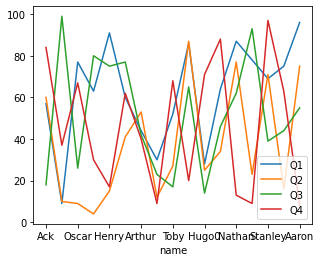

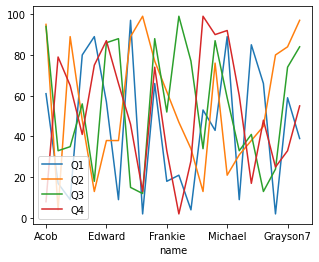

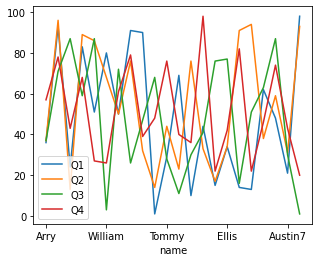

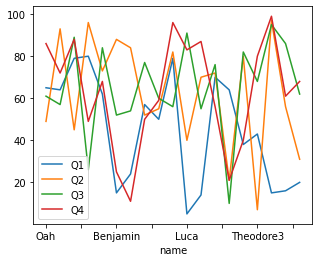

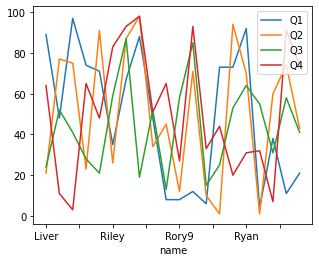

In [45]:
df.set_index('name').groupby('team').plot(figsize=(5,4))

A         AxesSubplot(0.1,0.679412;0.363636x0.220588)
B    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
C         AxesSubplot(0.1,0.414706;0.363636x0.220588)
D    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
E             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

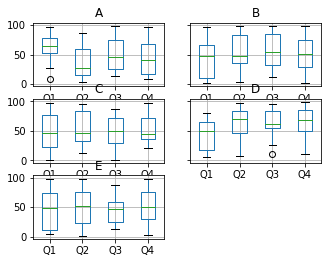

In [49]:
df.set_index('name').groupby('team').boxplot(figsize=(5,4))

array([[<AxesSubplot:title={'center':'Q1'}, xlabel='[team]'>,
        <AxesSubplot:title={'center':'Q2'}, xlabel='[team]'>],
       [<AxesSubplot:title={'center':'Q3'}, xlabel='[team]'>,
        <AxesSubplot:title={'center':'Q4'}, xlabel='[team]'>]],
      dtype=object)

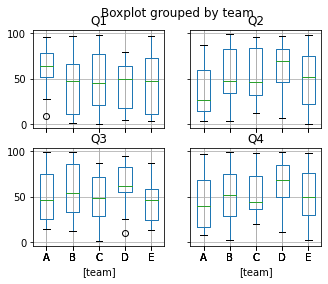

In [51]:
# 同上，boxplot 既可以分组后绘制，也可再绘制是指定分组
df.set_index('name').boxplot(by='team',figsize=(5,4))